In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Conversión de columnas
#Dataframe
df = pd.read_csv('../data/raw/gym_members_exercise_tracking.csv')
#Gender Male or female
df.insert(2, 'Gender_Male', np.where(df['Gender'] == 'Male', 1, 0))
df.insert(3, 'Gender_Female', np.where(df['Gender'] == 'Female', 1, 0))

#Workout Type true or false 
df_dummies =  pd.get_dummies(df['Workout_Type']).astype(int)
df = pd.merge(df, df_dummies, how='inner', left_index=True,right_index=True)

In [5]:
# Guardado de CSV
df.to_csv('../data/processed/gym_members_processed.csv', index=False)

# Visualizaciones

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Gender_Male                    973 non-null    int64  
 3   Gender_Female                  973 non-null    int64  
 4   Weight (kg)                    973 non-null    float64
 5   Height (m)                     973 non-null    float64
 6   Max_BPM                        973 non-null    int64  
 7   Avg_BPM                        973 non-null    int64  
 8   Resting_BPM                    973 non-null    int64  
 9   Session_Duration (hours)       973 non-null    float64
 10  Calories_Burned                973 non-null    float64
 11  Workout_Type                   973 non-null    object 
 12  Fat_Percentage                 973 non-null    flo

In [8]:
df.describe()

Age  Gender_Male  Gender_Female  Weight (kg)  Height (m)  \
count  973.000000   973.000000     973.000000   973.000000   973.00000   
mean    38.683453     0.525180       0.474820    73.854676     1.72258   
std     12.180928     0.499622       0.499622    21.207500     0.12772   
min     18.000000     0.000000       0.000000    40.000000     1.50000   
25%     28.000000     0.000000       0.000000    58.100000     1.62000   
50%     40.000000     1.000000       0.000000    70.000000     1.71000   
75%     49.000000     1.000000       1.000000    86.000000     1.80000   
max     59.000000     1.000000       1.000000   129.900000     2.00000   

          Max_BPM     Avg_BPM  Resting_BPM  Session_Duration (hours)  \
count  973.000000  973.000000   973.000000                973.000000   
mean   179.883864  143.766701    62.223022                  1.256423   
std     11.525686   14.345101     7.327060                  0.343033   
min    160.000000  120.000000    50.000000                  0.500000   
25%    170.000000  131.000000    56.000000                  1.040000   
50%    180.000000  143.000000    62.000000                  1.260000   
75%    190.000000  156.000000    68.000000                  1.460000   
max    199.000000  169.000000    74.000000                  2.000000   

       Calories_Burned  Fat_Percentage  Water_Intake (liters)  \
count       973.000000      973.000000             973.000000   
mean        905.422405       24.976773               2.626619   
std         272.641516        6.259419               0.600172   
min         303.000000       10.000000               1.500000   
25%         720.000000       21.300000               2.200000   
50%         893.000000       26.200000               2.600000   
75%        1076.000000       29.300000               3.100000   
max        1783.000000       35.000000               3.700000   

       Workout_Frequency (days/week)  Experience_Level         BMI  \
count                     973.000000        973.000000  973.000000   
mean                        3.321686          1.809866   24.912127   
std                         0.913047          0.739693    6.660879   
min                         2.000000          1.000000   12.320000   
25%                         3.000000          1.000000   20.110000   
50%                         3.000000          2.000000   24.160000   
75%                         4.000000          2.000000   28.560000   
max                         5.000000          3.000000   49.840000   

           Cardio        HIIT    Strength        Yoga  
count  973.000000  973.000000  973.000000  973.000000  
mean     0.262076    0.227133    0.265159    0.245632  
std      0.439990    0.419194    0.441645    0.430683  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000

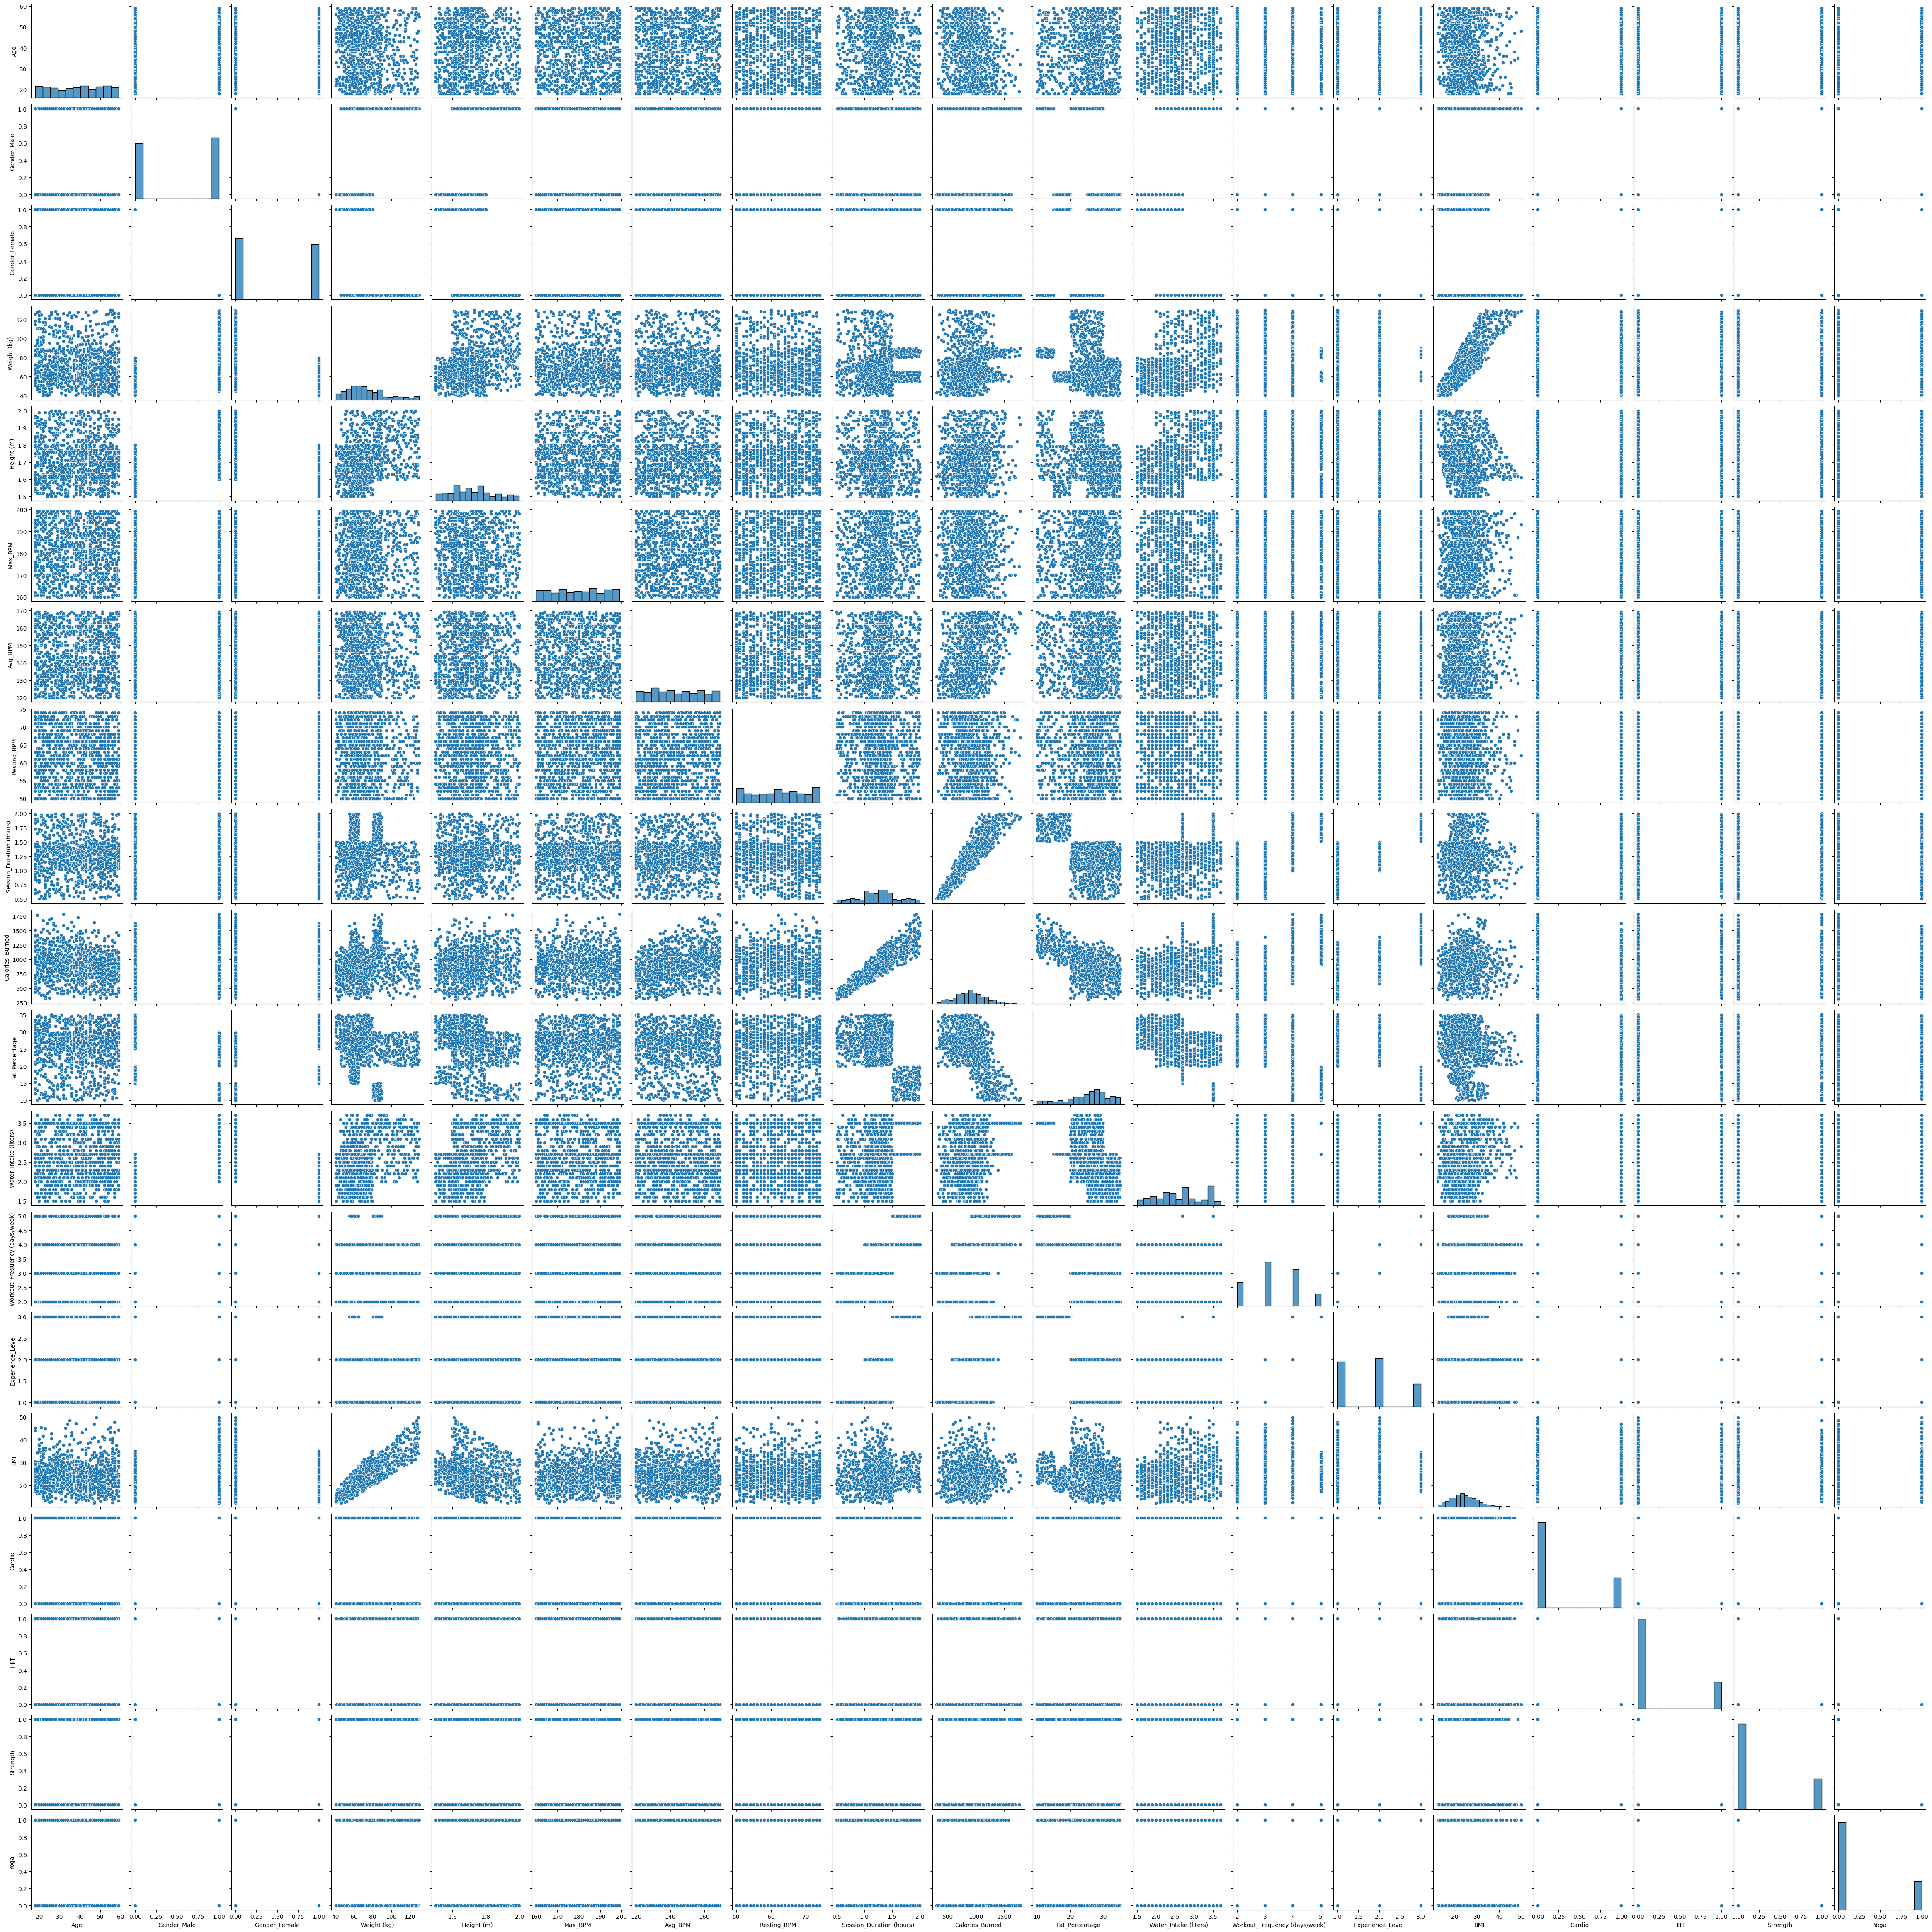

In [6]:
sns.pairplot(df)

<Axes: >

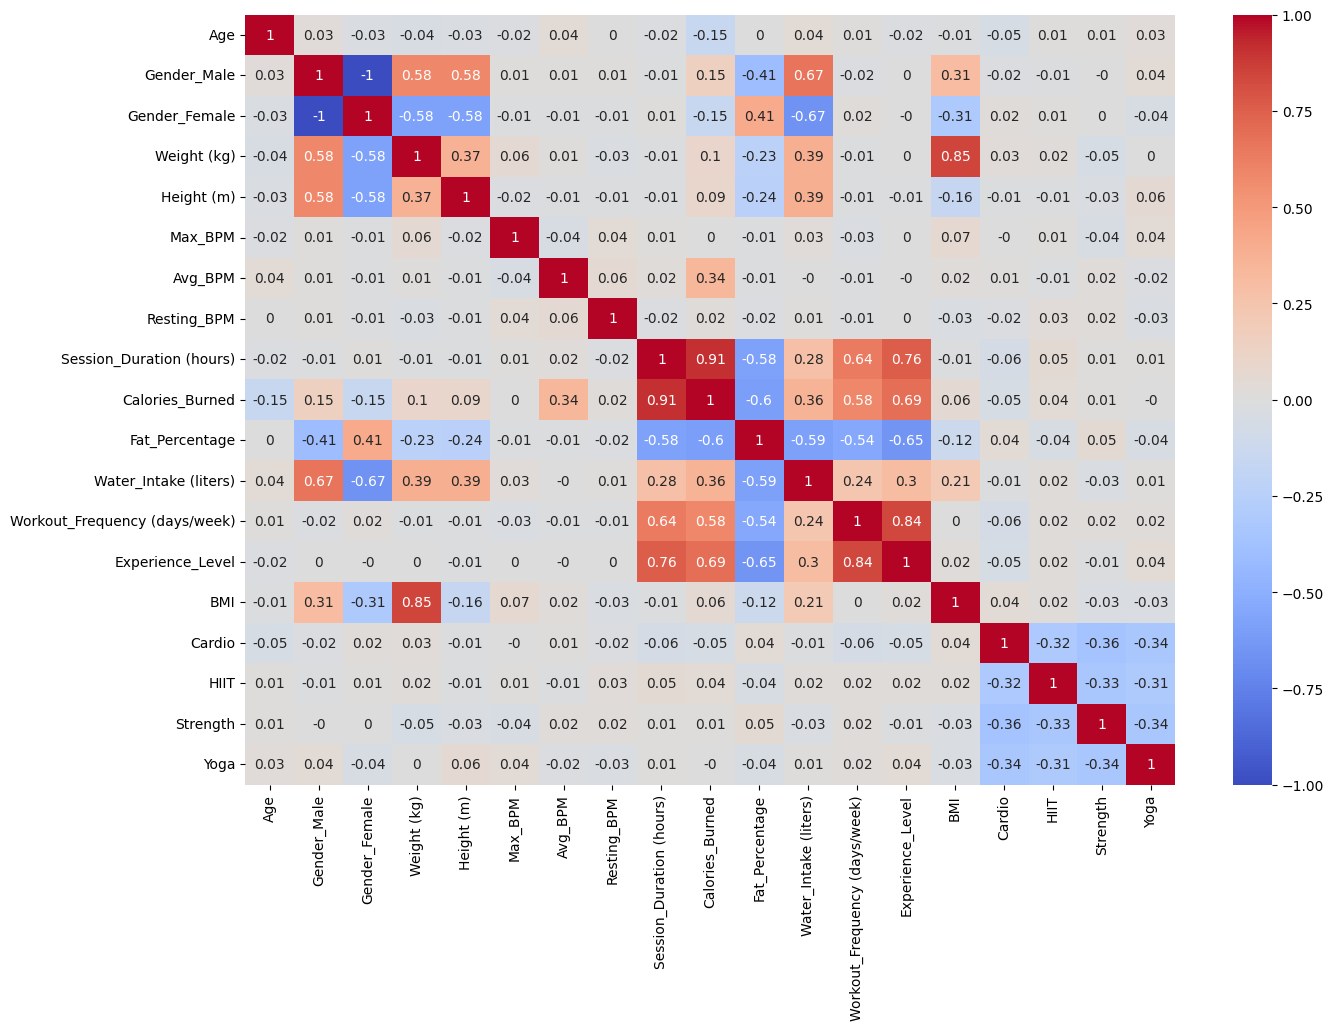

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='coolwarm')